In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NYC_Dog_Licensing_Dataset.csv')
df.isna().sum()

RowNumber                  0
AnimalName               706
AnimalGender              18
AnimalBirthMonth           0
BreedName                  0
Borough               345727
ZipCode                    0
LicenseIssuedDate          0
LicenseExpiredDate         0
Extract Year               0
dtype: int64

In [3]:
print(type(df.LicenseIssuedDate[0]))
print(type(df.LicenseExpiredDate[0]))

<class 'str'>
<class 'str'>


In [4]:
#Need to add the proper date formats
df['LicenseIssuedDate'] = pd.to_datetime(df.LicenseIssuedDate)
df['LicenseExpiredDate'] = pd.to_datetime(df.LicenseExpiredDate)

In [5]:
df.tail()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
345722,117367,BOLAND,F,2018,Pomeranian,NaN,10306,2018-12-31,2019-12-31,2018
345723,117368,UNKNOWN,M,2018,Australian Shepherd,NaN,11233,2018-12-31,2019-12-31,2018
345724,117369,UNKNOWN,F,2018,Dachshund,NaN,10454,2018-12-31,2019-12-31,2018
345725,117370,LUNA,F,2018,Jindo,NaN,11385,2018-12-31,2019-12-31,2018
345726,117371,HUNTER,M,2017,Siberian Husky,NaN,10456,2018-12-31,2019-12-31,2018


In [6]:
# List of boro zip codes. Zip codes taken from state gov website 
mh = [10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036, 10029, 10035,
      10010, 10016, 10017, 10022, 10012, 10013, 10014, 10004, 10005, 10006, 10007, 10038, 10280,
      10002, 10003, 10009, 10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025,10031, 
      10032, 10033, 10034, 10040]

bx = [10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474,
      10463, 10471, 10466, 10469, 10470, 10475, 10461, 10462, 10464, 10465, 10472, 10473]

bk = [11212, 11213, 11216, 11233, 11238, 11209, 11214, 11228, 11204, 11218, 11219, 11230, 11234, 
      11236, 11239, 11223, 11224, 11229, 11235, 11201, 11205, 11215, 11217, 11231, 11203, 11210, 
      11225, 11226, 11207, 11208, 11211, 11222, 11220, 11232, 11206, 11221, 11237]

qu = [11361, 11362, 11363, 11364, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 
      11367, 11412, 11423, 11432, 11433, 11434, 11435, 11436, 11101, 11102, 11103, 11104, 11105, 
      11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697, 11004, 11005, 
      11411, 11413, 11422, 11426, 11427, 11428, 11429 ,11414, 11415, 11416, 11417, 11418, 
      11419, 11420, 11421, 11368, 11369, 11370, 11372, 11373, 11377, 11378]

si = [10302, 10303, 10310,10306, 10307, 10308, 10309, 10312, 10301, 10304, 10305,10314]


In [7]:
#Now need to use the zipcode to fill in the Borough
def add_boro(zip_code):
    if zip_code in bk:
        return "Brooklyn"
    if zip_code in mh:
        return "Manhattan"
    if zip_code in bx:
        return "Bronx"
    if zip_code in si:
        return "Staten Island"
    if zip_code in qu:
        return "Queens"

In [8]:
df['Borough'] = df.ZipCode.apply(add_boro)
df.sample(10)

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
54088,54089,KILO,M,2006,American Pit Bull Terrier/Pit Bull,Brooklyn,11233,2016-04-05,2017-04-05,2016
237153,8798,MAGIC,F,2010,Shih Tzu,None,11109,2016-11-30,2018-11-30,2018
57736,57737,TEDDY,M,2002,Shih Tzu,Brooklyn,11235,2016-04-21,2017-03-20,2016
294867,66512,MITCH,M,2015,German Shepherd Crossbreed,Manhattan,10024,2018-04-15,2019-05-13,2018
202750,90032,AXEL,M,2017,Chihuahua Crossbreed,Manhattan,10016,2017-08-27,2018-08-27,2017
19367,19368,SUNNY,M,1999,Bichon Frise,Manhattan,10128,2015-07-07,2016-07-07,2016
80429,80430,BERTIE,F,2013,"Bull Dog, English",Manhattan,10023,2016-07-22,2017-09-20,2016
262134,33779,HOOCH,M,2011,Labrador Retriever,Manhattan,10012,2017-09-01,2018-09-01,2018
109194,109195,BOUDICCA,F,2006,American Pit Bull Mix / Pit Bull Mix,Manhattan,10009,2016-12-08,2017-12-30,2016
82592,82593,HARLEY,F,2013,German Shepherd Crossbreed,Brooklyn,11218,2016-08-01,2017-04-08,2016


In [9]:
#Checking that is worked
df.isna().sum()

RowNumber                0
AnimalName             706
AnimalGender            18
AnimalBirthMonth         0
BreedName                0
Borough               5438
ZipCode                  0
LicenseIssuedDate        0
LicenseExpiredDate       0
Extract Year             0
dtype: int64

In [10]:
df.loc[df.Borough.isna()].head()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
50,51,MIA,F,2013,Rottweiler,None,33185,2014-09-15,2017-09-15,2016
246,247,PEBBLE,F,2012,Maltese,None,11249,2014-10-01,2017-10-19,2016
264,265,MAXI,M,2013,"Poodle, Toy",None,10282,2014-10-03,2016-10-03,2016
566,567,PAPI,M,2010,Havanese,None,10282,2014-10-27,2017-11-24,2016
608,609,LOLA,F,2011,Beagle Crossbreed,None,11109,2014-10-31,2019-11-15,2016


In [11]:
# There are a lot of provided zipcodes that are not accurate. Need to see that breakdown by year.
# Will come back to this in future work --> try and see why there are unaccounted zip codes.
df.loc[df.Borough.isna()].LicenseIssuedDate.dt.year.value_counts()

2017    1779
2016    1738
2018    1127
2015     763
2014      31
Name: LicenseIssuedDate, dtype: int64

In [12]:
# Now want to add animal age 
def add_age(birth,license):
    return license.year - birth

In [13]:
df['Ages'] = df.apply(lambda x: add_age(x['AnimalBirthMonth'],x['LicenseIssuedDate']),axis=1)

In [14]:
# Check that it worked
df.sample(10)

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,Ages
328776,100421,MACK,M,2018,Yorkshire Terrier,Manhattan,10027,2018-09-29,2019-09-29,2018,0
240287,11932,PRINCE,M,2016,Maltipoo,None,10069,2017-02-04,2018-02-04,2018,1
91503,91504,ABUGHAZEH,F,2016,Yorkshire Terrier,Staten Island,10312,2016-09-10,2017-09-10,2016,0
264847,36492,GUTKIN,M,2017,Maltese,Brooklyn,11229,2017-09-22,2018-09-22,2018,0
133922,21204,BANDIT,M,2011,Pomeranian,Brooklyn,11239,2016-06-17,2017-06-16,2017,5
210764,98046,PHOEBE,F,2006,Unknown,None,11243,2017-09-24,2018-10-02,2017,11
72502,72503,HUMPHREY,M,2008,Weimaraner,Queens,11101,2016-06-21,2017-06-08,2016,8
259958,31603,KEFIRA,F,2005,Pomeranian Crossbreed,Manhattan,10024,2017-08-12,2019-08-12,2018,12
122150,9432,ASTOR,M,2015,Terrier mix,Queens,11105,2016-02-19,2021-02-19,2017,1
5528,5529,CALAMITY,F,2007,Beagle Crossbreed,Bronx,10465,2015-02-22,2018-03-23,2016,8


In [15]:
#see current active licenses (all the licenses that haven't expired yet)
active = df.loc[df.LicenseExpiredDate.dt.year >= 2019]
len(active)

110658

In [16]:
active.Borough.value_counts()

Manhattan        39593
Brooklyn         27703
Queens           22055
Bronx            10365
Staten Island     9195
Name: Borough, dtype: int64

In [17]:
active.AnimalGender.value_counts()

M    59723
F    50927
Name: AnimalGender, dtype: int64

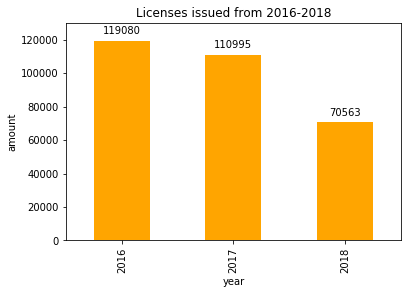

In [58]:
#plot how many licensed issued by year
title = "Licenses issued from 2016-2018"
fig = df.loc[ (df.LicenseIssuedDate.dt.year >=2016)& (df.LicenseIssuedDate.dt.year <=2018)].LicenseIssuedDate.dt.year.value_counts().sort_index().plot(kind="bar",title=title,color="orange")
fig.set_xlabel('year')
fig.set_ylabel('amount')
fig.set_ylim(0,130000)

for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()+1),ha="center",va="center",
                xytext=(0, 10),textcoords='offset points')

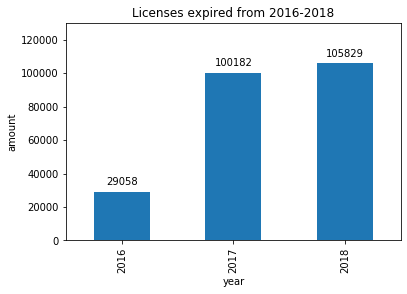

In [57]:
#Plot licenses expiring from 2016-2018
title = "Licenses expired from 2016-2018"
fig = df.loc[df.LicenseExpiredDate.dt.year <=2018].LicenseExpiredDate.dt.year.value_counts().sort_index().plot(kind="bar",title=title)
fig.set_xlabel('year')
fig.set_ylabel('amount')
fig.set_ylim(0,130000)


for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()+1),ha="center",va="center",
                xytext=(0, 10),textcoords='offset points')

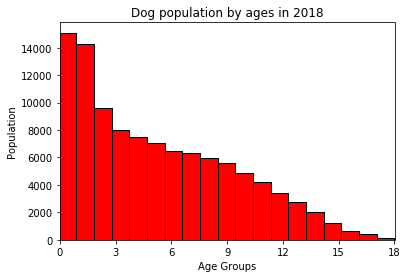

In [54]:
# Have to make sense of the clear difference. In 2018 there were over 35 thousand licenses expired than issued
age = df.loc[(df.LicenseExpiredDate.dt.year == 2018) & (df.Ages <19)].Ages.plot(kind="hist",color='red',bins=20,
                                                                                edgecolor="black",title="Dog population by ages in 2018")
age.set_xlabel("Age Groups")
age.set_ylabel("Population")
age.set_xlim(0,18)
age.set_xticks([0,3,6,9,12,15,18])


#Note capped the ages at 18 to account for account for outliers. Age data is self reported and some dogs had inputed
#ages that made them 100+ years old. 

In [21]:
df.loc[df.LicenseExpiredDate.dt.year == 2018].Ages.median()

4.0

In [22]:
#Unlikely that dogs are dying with the median age being so young. However there are also less licenses issued in 2018,
#so that does imply that less dogs purchased/adopted.

#Need to check most common dogs --> try and figure out how many licenses are being renewed




In [23]:
df.BreedName.value_counts().head()

Unknown              38785
Yorkshire Terrier    21922
Shih Tzu             19631
Chihuahua            15647
Maltese              11391
Name: BreedName, dtype: int64

In [24]:
df.loc[df.BreedName == "Yorkshire Terrier"].AnimalName.value_counts().head()

NAME NOT PROVIDED    417
BELLA                378
COCO                 352
UNKNOWN              331
MAX                  319
Name: AnimalName, dtype: int64

In [25]:
df.AnimalName.value_counts().head()

UNKNOWN              5379
BELLA                3824
NAME NOT PROVIDED    3763
MAX                  3582
CHARLIE              2852
Name: AnimalName, dtype: int64

In [26]:
df.loc[df.AnimalName == "BELLA"].BreedName.value_counts().head()

Unknown              462
Yorkshire Terrier    378
Shih Tzu             304
Maltese              183
Chihuahua            166
Name: BreedName, dtype: int64

In [27]:
#So in NYC Yorkshire Terrier's the most common dog. Want to check dogs named Bella by age to track growth by the year. 
#Want to first figure out expiration time.

In [28]:
def expire_time(start,end):
    return end.year - start.year

In [29]:
df['ExpireTime'] = df.apply(lambda x: expire_time(x['LicenseIssuedDate'],x['LicenseExpiredDate']),axis=1)

In [30]:
df['ExpireTime'].value_counts()

1     264896
2      40957
5      19058
3      13646
0       3862
4       2757
6        535
10         7
7          5
9          3
8          1
Name: ExpireTime, dtype: int64

In [31]:
df.loc[(df.LicenseIssuedDate.dt.year==2016)&(df.BreedName == "Yorkshire Terrier")&(df.Ages == 0) &
      (df.AnimalName == "BELLA")].ExpireTime.value_counts()

1    26
Name: ExpireTime, dtype: int64

In [32]:
#Now want to check how many licenses were issued in 2017 for 1 year old dogs. If none of these puppies less than 
#1 died, then there should be at least 26 licenses issued. 
df.loc[(df.LicenseIssuedDate.dt.year==2017)&(df.BreedName == "Yorkshire Terrier")&(df.Ages == 1) &
      (df.AnimalName == "BELLA")].ExpireTime.value_counts()

1    17
2     4
Name: ExpireTime, dtype: int64

In [33]:
#We've had a net loss of 5 licenses. In 2018 we should expect to see at least 17 licenses assuming no deaths. 
df.loc[(df.LicenseIssuedDate.dt.year==2018)&(df.BreedName == "Yorkshire Terrier")&(df.Ages == 2) &
      (df.AnimalName == "BELLA")].ExpireTime.value_counts()

1    4
Name: ExpireTime, dtype: int64

In [34]:
#In 2016 there were 25 Yorkshire Terrier's named Bella under age 1 that were issued one year licenses. 
#Then by 2018 there were only 4 Yorkshire Terrier's that were 2. 
#Will tie this to zipcode to see these results. 
#First just want to see which zipcodes have the most dogs

In [35]:
top = df.loc[df.Ages == 0].ZipCode.value_counts().sort_values(ascending=False)[:9]
zip_list = top.index.tolist()

In [36]:
def top_breed(code):
    code_df = df.loc[(df.ZipCode == code)&(df.Ages == 0) & (df.LicenseIssuedDate.dt.year == 2016)
                    & (df.ExpireTime == 1)]
    breed = code_df.BreedName.value_counts().index[0]
    return breed
def make_year(code,breed,year,age):
    
    issued = len(df.loc[(df.ZipCode == code)&(df.Ages == age) & (df.LicenseIssuedDate.dt.year == year)
                     & (df.BreedName == breed)])
    return issued
    

In [37]:
year_df = pd.DataFrame()
year_df['ZipCode'] = zip_list
year_df['Breed'] = year_df['ZipCode'].apply(top_breed)
year_df['Issued2016'] = year_df.apply(lambda x: make_year(x['ZipCode'],x['Breed'],2016,0),axis=1)
year_df['Issued2017'] = year_df.apply(lambda x: make_year(x['ZipCode'],x['Breed'],2017,1),axis=1)
year_df['Issued2018'] = year_df.apply(lambda x: make_year(x['ZipCode'],x['Breed'],2018,2),axis=1)

In [38]:
year_df

,ZipCode,Breed,Issued2016,Issued2017,Issued2018
0,10011,French Bulldog,31,34,4
1,11201,Australian Shepherd,19,7,5
2,10009,French Bulldog,17,18,5
3,10025,Labrador Retriever Crossbreed,11,18,4
4,10128,Australian Shepherd,9,3,2
5,10023,French Bulldog,22,14,5
6,10003,French Bulldog,17,12,2
7,10014,French Bulldog,28,19,4
8,10019,French Bulldog,20,22,3


In [39]:
#Now I want to get a sense of how many licenses were expected to be issued in 2017 and 2018
def get_expected(code,breed,year):
    
    if year == 2017:
        expect = len(df.loc[(df.ZipCode == code) &(df.Ages == 0) & (df.LicenseIssuedDate.dt.year == 2016)
                           &(df.BreedName == breed) &(df.ExpireTime == 1)])
    if year == 2018:
         expect = len(df.loc[(df.ZipCode == code) &(df.Ages == 0) & (df.LicenseIssuedDate.dt.year == 2016)
                           &(df.BreedName == breed) & (df.ExpireTime == 2)]) + len(df.loc[(df.ZipCode == code) &(df.Ages == 1) & (df.LicenseIssuedDate.dt.year == 2017)
                           &(df.BreedName == breed) & (df.ExpireTime == 1)])
    
    return expect

In [40]:
get_expected(10019,"French Bulldog",2017)

20

In [41]:
year_df

,ZipCode,Breed,Issued2016,Issued2017,Issued2018
0,10011,French Bulldog,31,34,4
1,11201,Australian Shepherd,19,7,5
2,10009,French Bulldog,17,18,5
3,10025,Labrador Retriever Crossbreed,11,18,4
4,10128,Australian Shepherd,9,3,2
5,10023,French Bulldog,22,14,5
6,10003,French Bulldog,17,12,2
7,10014,French Bulldog,28,19,4
8,10019,French Bulldog,20,22,3


In [42]:
year_df['Expected2017'] = year_df.apply(lambda x: get_expected(x['ZipCode'],x['Breed'],2017),axis=1)

In [43]:
year_df['Expected2018'] = year_df.apply(lambda x: get_expected(x['ZipCode'],x['Breed'],2018),axis=1)

In [44]:
#There needs to be more compliance. But the system also doesn't incentivize compliance. Look at the distribution
#of licenses by expiration time.

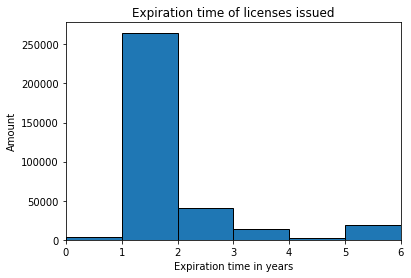

In [53]:
expire_plot = df['ExpireTime'].plot(kind="hist",edgecolor="black",title = "Expiration time of licenses issued")
expire_plot.set_xlabel("Expiration time in years")
expire_plot.set_ylabel("Amount")
expire_plot.set_xlim(0,6)

In [59]:
#Get quick facts --> most common names

In [64]:
df.loc[df.AnimalGender == "M"].AnimalName.value_counts().head(10)

MAX                  3528
UNKNOWN              3139
CHARLIE              2475
NAME NOT PROVIDED    2432
ROCKY                2373
BUDDY                1995
TEDDY                1667
LUCKY                1667
TOBY                 1478
MILO                 1336
Name: AnimalName, dtype: int64

In [65]:
df.loc[df.AnimalGender == "F"].AnimalName.value_counts().head(10)

BELLA       3814
LOLA        2462
UNKNOWN     2240
LUCY        2134
LUNA        1957
DAISY       1882
COCO        1848
PRINCESS    1625
CHLOE       1487
MOLLY       1400
Name: AnimalName, dtype: int64

In [66]:
df.BreedName.value_counts().head(10)

Unknown                                 38785
Yorkshire Terrier                       21922
Shih Tzu                                19631
Chihuahua                               15647
Maltese                                 11391
Labrador Retriever                      11327
American Pit Bull Mix / Pit Bull Mix    10304
Labrador Retriever Crossbreed            8511
American Pit Bull Terrier/Pit Bull       8319
Pomeranian                               6345
Name: BreedName, dtype: int64